In [1]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
df = pd.read_csv("files/iris.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 1 variable

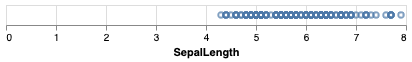

In [3]:
alt.Chart(df).mark_point().encode(x='SepalLength')

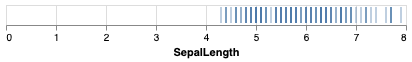

In [4]:
alt.Chart(df).mark_tick().encode(x='SepalLength')

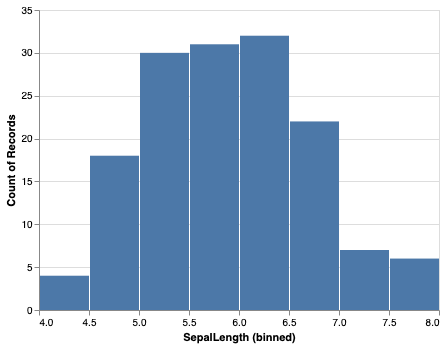

In [5]:
alt.Chart(df).mark_bar().encode(
    alt.X("SepalLength", bin=True),
    y='count()',
)

# 2 variables

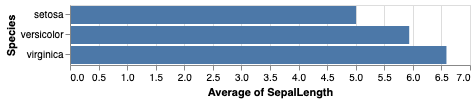

In [6]:
alt.Chart(df).mark_bar().encode(
    x='average(SepalLength)', y='Species'
)

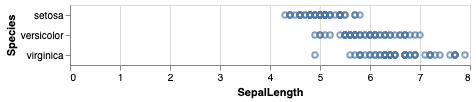

In [7]:
alt.Chart(df).mark_point().encode(
    x='SepalLength', y='Species'
)

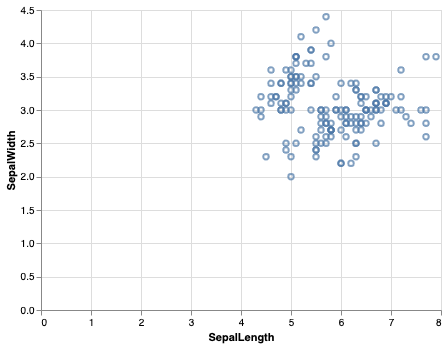

In [8]:
alt.Chart(df).mark_point().encode(
    x='SepalLength', y='SepalWidth'
).interactive()

# 3 variables

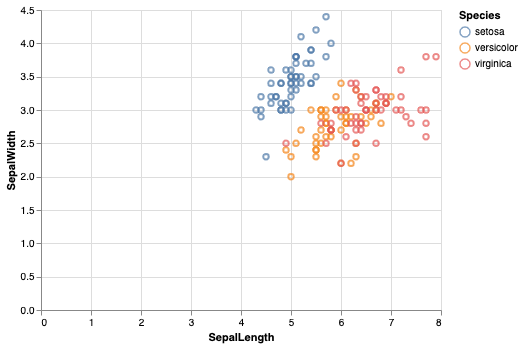

In [22]:
alt.Chart(df).mark_point().encode(
    x='SepalLength',
    y='SepalWidth',
    color='Species',
    tooltip='Species'
).interactive()

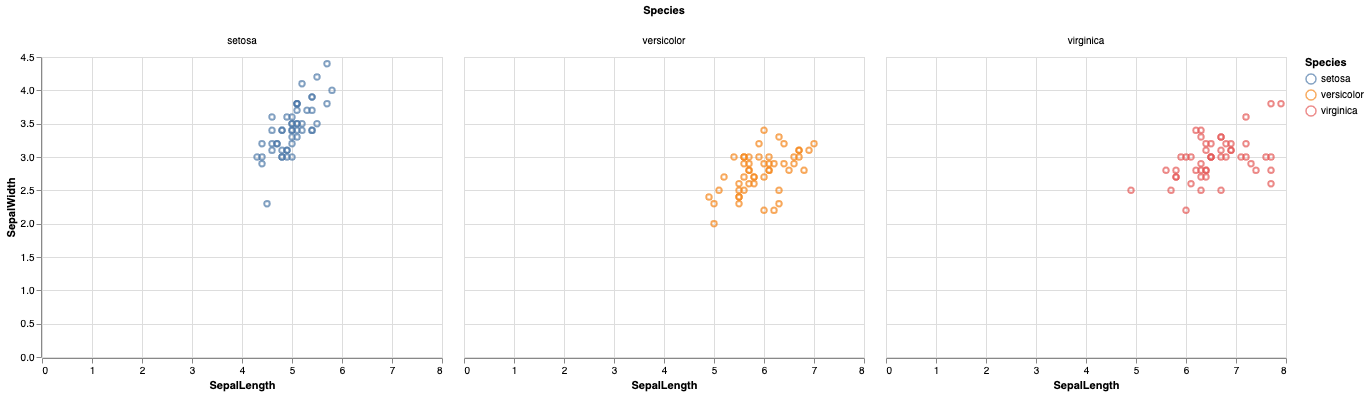

In [23]:
alt.Chart(df).mark_point().encode(
    x='SepalLength',
    y='SepalWidth',
    color='Species',
    column='Species'
)

# Multivariate

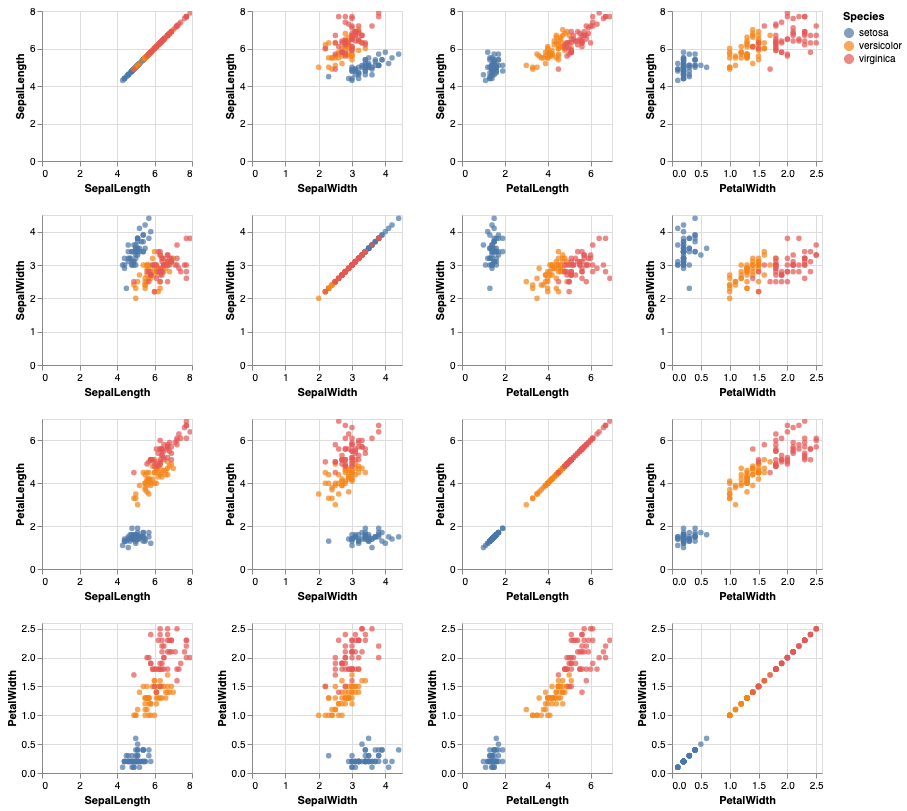

In [11]:
alt.Chart(df).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"),    type='quantitative'),
    color='Species:N'
).properties(
    width=150,
    height=150
).repeat(
    row=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"],
    column=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]
).interactive()

# Selection

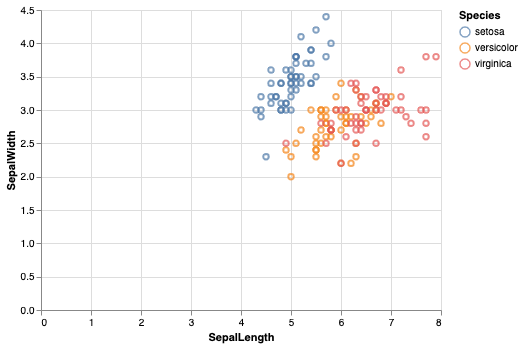

In [15]:
alt.Chart(df).mark_point().encode(
    x='SepalLength',
    y='SepalWidth',
    color='Species'
).add_selection(alt.selection_interval())

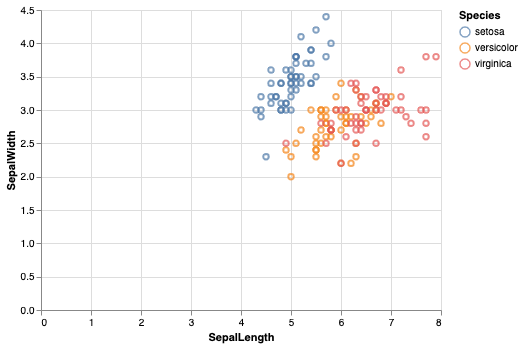

In [16]:
square_selection = alt.selection_interval()

alt.Chart(df).mark_point().encode(
    x='SepalLength',
    y='SepalWidth',
    color=alt.condition(square_selection, 'Species', alt.value('lightgray'))
).add_selection(square_selection)

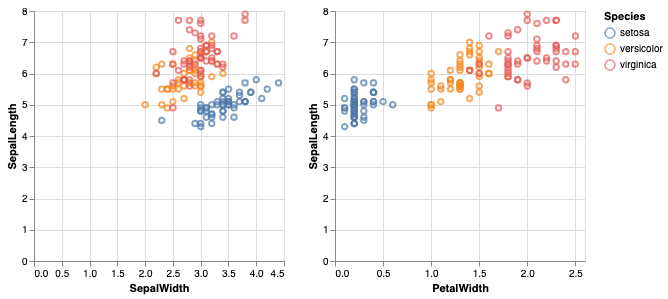

In [17]:
square_selection = alt.selection_interval()

chart = alt.Chart(df).mark_point().encode(
    y='SepalLength',
    color=alt.condition(square_selection, 'Species', alt.value('lightgray'))
).properties(
    width=250,
    height=250
).add_selection(square_selection)

chart.encode(x='SepalWidth:Q') | chart.encode(x='PetalWidth:Q')

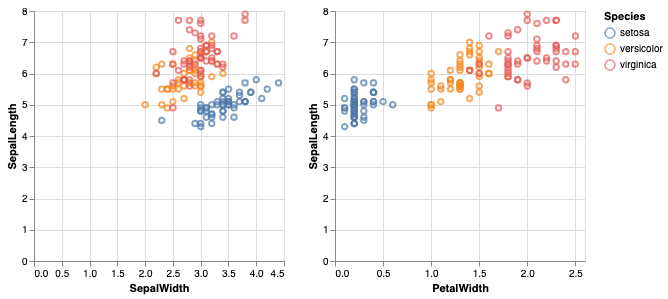

In [19]:
interval_selection = alt.selection_interval(encodings=['x'])

chart = alt.Chart(df).mark_point().encode(
    y='SepalLength',
    color=alt.condition(interval_selection, 'Species', alt.value('lightgray'))
).properties(
    width=250,
    height=250
).add_selection(interval_selection)

chart.encode(x='SepalWidth:Q') | chart.encode(x='PetalWidth:Q')

# Machine Learning

In [14]:
import h2o
from h2o.automl import H2OAutoML

In [13]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_221"; Java(TM) SE Runtime Environment (build 1.8.0_221-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.221-b11, mixed mode)
  Starting server from /anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/87/5s0rrx9j0mj1g7333605n3l80000gn/T/tmp4s02w97_
  JVM stdout: /var/folders/87/5s0rrx9j0mj1g7333605n3l80000gn/T/tmp4s02w97_/h2o_javi_started_from_python.out
  JVM stderr: /var/folders/87/5s0rrx9j0mj1g7333605n3l80000gn/T/tmp4s02w97_/h2o_javi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Europe/Madrid
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.2
H2O cluster version age:,2 months and 28 days
H2O cluster name:,H2O_from_python_javi_9d2ml2
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [15]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("files/iris.csv")
train.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


SepalLength,SepalWidth,PetalLength,PetalWidth,Species
5.1,3.5,1.4,0.2,setosa
4.9,3,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [16]:
# Identify predictors and response
x = train.columns
y = "Species"
x.remove(y)

In [17]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [18]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,mean_per_class_error,logloss,rmse,mse
DeepLearning_grid_1_AutoML_20191025_093111_model_2,0.0266667,0.371852,0.172024,0.0295923
GLM_grid_1_AutoML_20191025_093111_model_1,0.0266667,0.0674222,0.14835,0.0220077
DeepLearning_grid_1_AutoML_20191025_093111_model_1,0.0266667,0.156462,0.160468,0.0257501
StackedEnsemble_AllModels_AutoML_20191025_093111,0.04,0.19108,0.205341,0.0421649
StackedEnsemble_BestOfFamily_AutoML_20191025_093111,0.04,0.195714,0.206362,0.0425853
GBM_1_AutoML_20191025_093111,0.0466667,0.167518,0.207741,0.0431563
XGBoost_grid_1_AutoML_20191025_093111_model_5,0.0533333,0.222572,0.236421,0.0558947
XGBoost_grid_1_AutoML_20191025_093111_model_2,0.0533333,0.391445,0.330706,0.109366
GBM_4_AutoML_20191025_093111,0.0533333,0.169784,0.215907,0.0466157
XGBoost_2_AutoML_20191025_093111,0.0533333,0.384413,0.327013,0.106937


In [35]:
df_lb = lb.as_data_frame()
best = df_lb["mean_per_class_error"].min()
best

0.02666666666666667

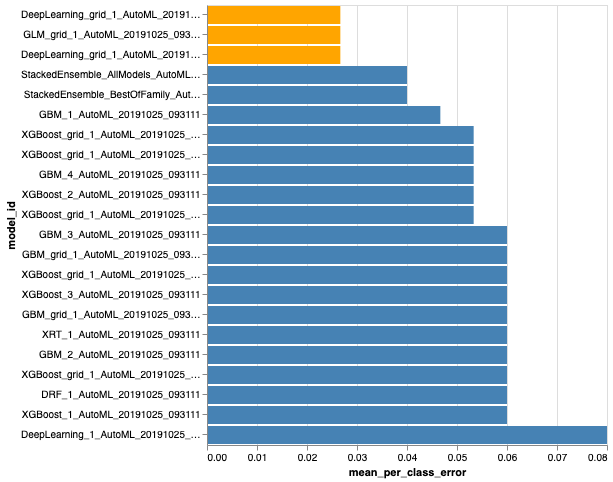

In [41]:
alt.Chart(lb.as_data_frame()).mark_bar().encode(
    alt.X("mean_per_class_error"),
    alt.Y("model_id", sort=alt.EncodingSortField(field="model_id", order='ascending')),
    color=alt.condition(
        alt.FieldEqualPredicate(field='mean_per_class_error', equal=best), alt.value('orange'), alt.value('steelblue')
    )
)